### Часть 1. Градиентный спуск как он есть

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# вычисление результирующей переменной на основе x
def result(x):
	return x**2.0 # можно задать как линейную так и нелинейную непрерывную функцию

In [ ]:

result(10)

100.0

In [ ]:
# диапазоны
bounds = np.array([[-10.0, 10.0]])

In [ ]:
# генерируем x из диапазона
x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
x

array([-4.91868934])

In [ ]:
inputs = []
outputs = []
for i in range(1000):
  x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  y = result(x)
  inputs.append(x)
  outputs.append(y)

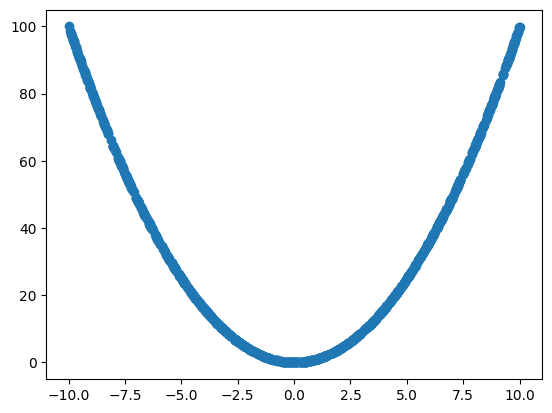

In [ ]:
plt.scatter(inputs, outputs)
# plot the solutions found
# plt.plot(solutions, scores, '.-', color='red')
plt.show()

In [ ]:
# сейчас мы попали в точку x. Как понять в какую сторону нужно двигаться для достижения минимума?
x

array([0.51413694])

In [ ]:
# функция без автоматизации вычисления производной. берем готовый вариант для упрощения
# по правилу цепочки производная от x^2 будет 2x

def der(x):
	return x * 2.0

In [ ]:
der(x)

array([1.02827388])

In [ ]:
# понижаем угол наклона вычитая из значения нашей функции некоторую "долю" градиента
new_x = x - 0.1*der(x)
new_x

array([0.41130955])

In [ ]:
# и так шаг за шагом
x = new_x
new_x = x - 0.1*der(x)
new_x

array([0.32904764])

In [ ]:
# очевидно что двигаемся к нулю...

In [ ]:
# А что если взять шаг побОООООльше
x = new_x
new_x = x - 1*der(x)
new_x

array([-0.32904764])

In [ ]:
# ОЙ! мы "проскочив" минимум попали на совершенно противоположный результат - так сходимости не достичь!!!

In [ ]:
step = 0.1

x = new_x
new_x = x - step*der(x)
new_x

array([-0.26323811])

In [ ]:
x = new_x
new_x = x - step*der(x)
new_x

array([-0.21059049])

In [ ]:
x = new_x
new_x = x - step*der(x)
new_x

array([-0.16847239])

In [ ]:
solutions = [] # угол наклона
evaluations = [] # количество ошибок

/tmp/ipython-input-2148788679.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, x, x_evaluation))


>0 f([2.00471301]) = 7.69783
>1 f([1.60282558]) = 4.01887
>2 f([1.3459206]) = 2.56905
>3 f([1.16477037]) = 1.81150
>4 f([1.02910137]) = 1.35669
>5 f([0.92319641]) = 1.05905
>6 f([0.83796725]) = 0.85229
>7 f([0.76774834]) = 0.70219
>8 f([0.70880459]) = 0.58944
>9 f([0.65856419]) = 0.50240
>10 f([0.61519351]) = 0.43371
>11 f([0.57734721]) = 0.37846
>12 f([0.54401423]) = 0.33333
>13 f([0.51441908]) = 0.29595
>14 f([0.48795638]) = 0.26463
>15 f([0.46414624]) = 0.23810
>16 f([0.44260306]) = 0.21543
>17 f([0.42301332]) = 0.19590
>18 f([0.40511929]) = 0.17894
>19 f([0.38870713]) = 0.16412


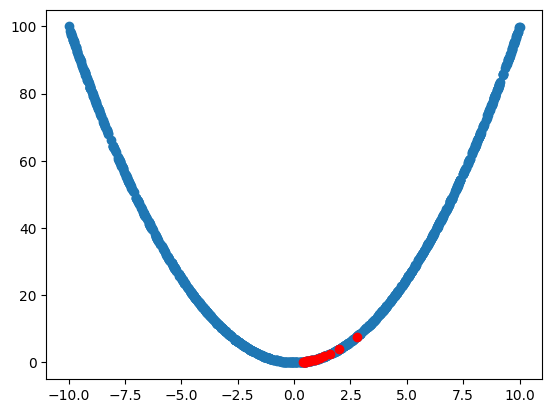

In [ ]:
# *для более наглядного результата можно позапускать код несколько раз

x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

for i in range(20):
  solutions.append(x)
  x_evaluation = result(x)
  evaluations.append(x_evaluation)

  gradient = result(x)
  new_x = x - 0.1 * gradient
  x = new_x
  print('>%d f(%s) = %.5f' % (i, x, x_evaluation))
plt.scatter(inputs, outputs)
# plot the solutions found
plt.scatter(solutions, evaluations, color='red')
plt.show()

Вывод: сильная зависимость от значений инициализации весов

### Часть 2. Исследование работы градиентного спуска

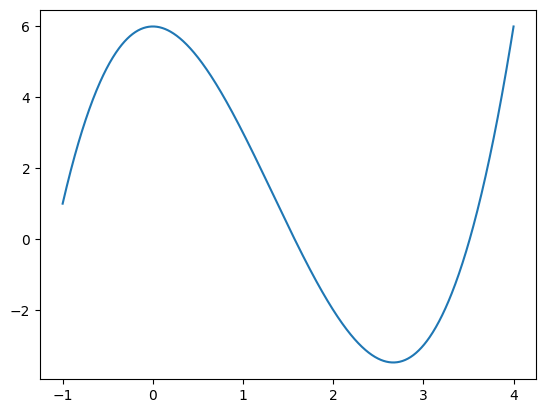

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f_x = lambda x: (x**3)-4*(x**2)+6
x = np.linspace(-1,4,1000)
plt.plot(x, f_x(x))
plt.show()

In [ ]:
f_x_derivative = lambda x: 3*(x**2)-8*x

In [ ]:
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplots(figsize=(10, 5))
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()

    plt.subplots(figsize=(10, 5))
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()

In [ ]:
def gradient_iterations(x_start, iterations, learning_rate):

    x_grad = [x_start]
    y_grad = [f_x(x_start)]

    for i in range(iterations):
        x_start_derivative = - f_x_derivative(x_start)
        x_start += (learning_rate * x_start_derivative)

        x_grad.append(x_start)
        y_grad.append(f_x(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Number of steps:  20


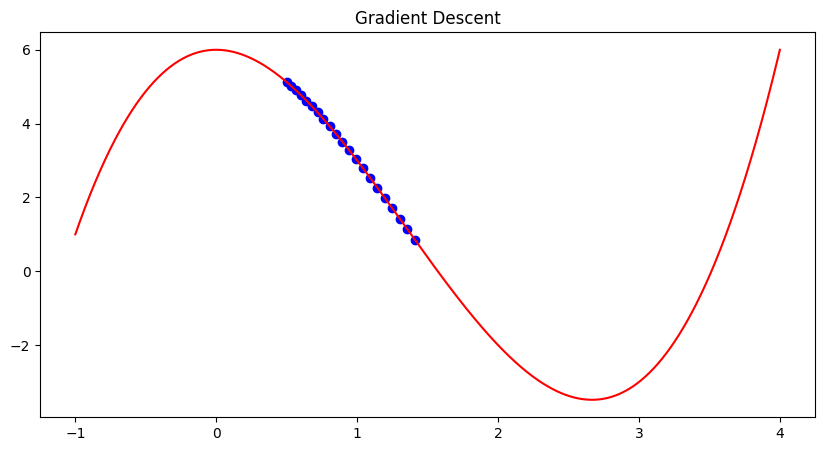

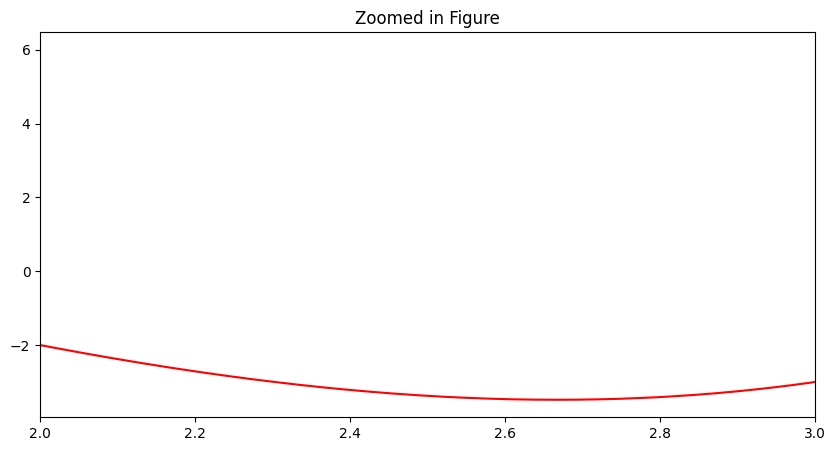

In [ ]:
gradient_iterations(0.5, 20, 0.01)

In [ ]:
def gradient_precision(x_start, precision, learning_rate):

    x_grad = [x_start]
    y_grad = [f_x(x_start)]

    while True:

        x_start_derivative = - f_x_derivative(x_start)
        x_start += (learning_rate * x_start_derivative)

        x_grad.append(x_start)
        y_grad.append(f_x(x_start))

        if abs(x_grad[len(x_grad)-1] - x_grad[len(x_grad)-2]) <= precision:
            print("Local minimum occurs at: {:.2f}".format(x_start))
            break

    print("Number of steps taken: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Local minimum occurs at: 2.66
Number of steps taken:  85


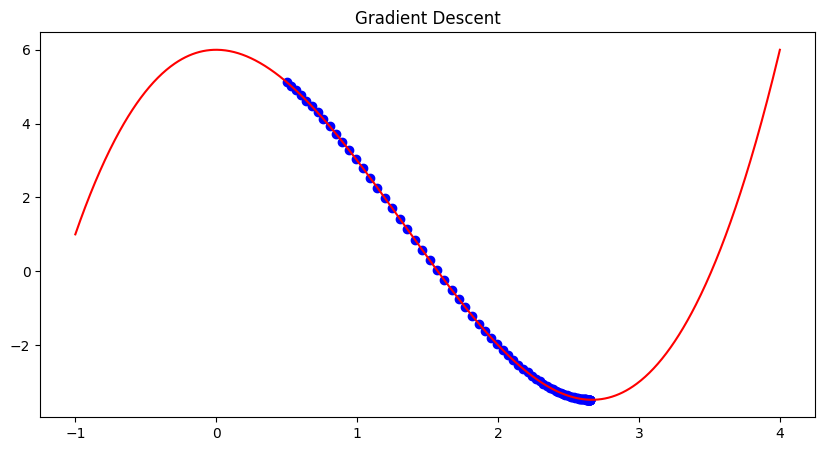

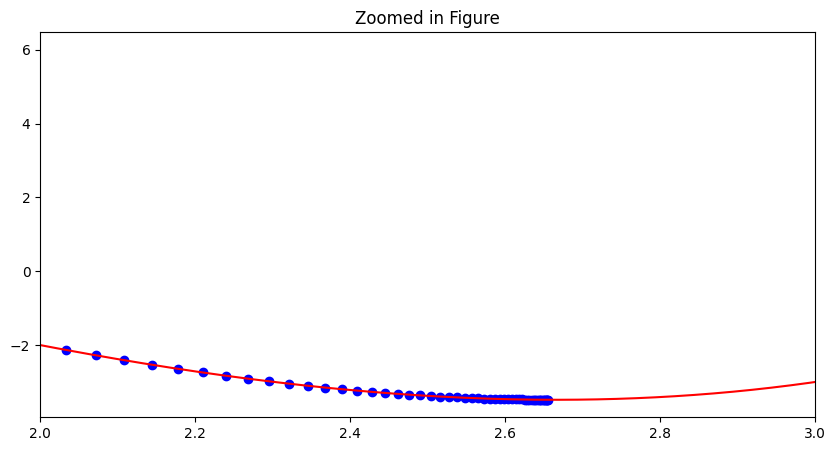

In [ ]:
gradient_precision(0.5, 0.001, 0.01)

А еще сложнее?

Рассмотрим следующие функции, с которыми будем работать в последующих примерах.

$f(x) = x^2-6*x+5$

$\frac{\partial f}{\partial x} = f'(x) = 2*x-6 $

$f_2(x) = x^2 + 15*sin(x)$

$f_2'(x) = 2*x + 15*cos(x) $

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Введём функции для расчёта значений исходных функций и их производных. Сделаем это жёстко, так как рассматриваем только конкретные примеры.

def f(x):
  return x*x - 6*x + 5

def dfdx(x):
  return 2*x - 6

def f2(x):
  return x*x + 15*np.sin(x)

def df2dx(x):
  return 2*x + 15*np.cos(x)

In [ ]:
# Введём ключевые параметры для работы (их можно изменять в рамках эксперимента)

N = 200 #количество итераций
lr = 1.1 #скорость оптимизации

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 2.305125096759656e+33 в точке -4.801171832750475e+16


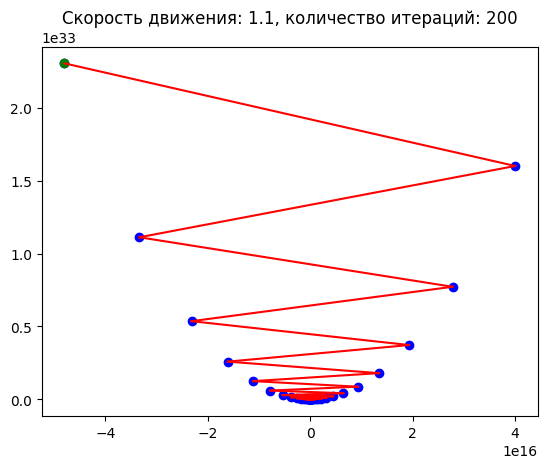

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

x_plot = np.arange(-5, 11, 0.01)
y_plot = [f(x) for x in x_plot]
ax.plot(x_plot, y_plot)

xc = -4 #начальное значение
print(f'Начальное значение минимумума: {f(xc)} в точке {xc}')

ax.scatter(xc, f(xc), c='r')


for _ in range(N):
  x0 = xc #нужно только для графика

  xc = xc - lr*dfdx(xc) #сам по себе градиентный спуск

  ax.scatter(xc, f(xc), c='b') #нужно только для графика
  ax.plot([x0,xc],[f(x0), f(xc)], c='r') #нужно только для графика

ax.scatter(xc, f(xc), c='g')

print(f'Финальное значение минимумума: {f(xc)} в точке {xc}')

plt.show()

#### Создание функции для расчёта

In [ ]:
def gd(N, lr, min = -5, max = 11, f=f, dfdx=dfdx, xc=-4):
    """
    Реализация и визуализация процедуры градиентного спуска
    для конкретной функции в упрощённом примере.

    Parameters
    ----------
    N: integer
        Число шагов градиентного спуска, которые необходимо выполнить.

    lr: float
        Скорость обучения

    min: float
        Минимальное значение, отображаемое на графике

    max: float
        Максимальное значение, отображаемое на графике

    f: function
        Целевая функция

    dfdx: function
        Градиент целевой функции

    Returns
    ----------
    """
    fig, ax = plt.subplots()
    ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

    x_plot = np.arange(min, max, 0.01)
    y_plot = [f(x) for x in x_plot]
    ax.plot(x_plot, y_plot)

    print(f'Начальное значение минимумума: {f(xc)} в точке {xc}')

    ax.scatter(xc, f(xc), c='r')

    for _ in range(N):
      x0 = xc #нужно только для графика

      xc = xc - lr*dfdx(xc) #сам по себе градиентный спуск

      ax.scatter(xc, f(xc), c='b') #нужно только для графика
      ax.plot([x0,xc],[f(x0), f(xc)], c='r') #нужно только для графика

    ax.scatter(xc, f(xc), c='g')

    print(f'Финальное значение минимумума: {f(xc)} в точке {xc}')
    plt.show()

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 45 в точке -4


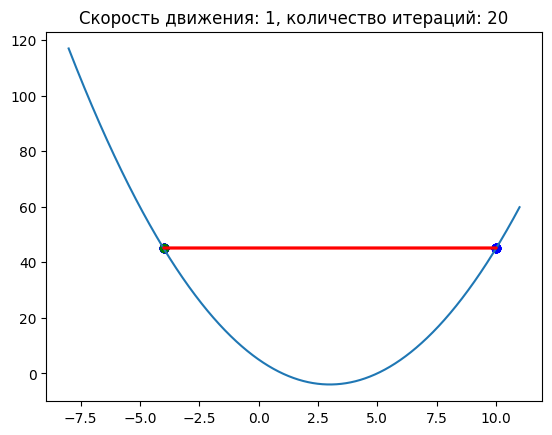

In [ ]:
gd(20, 1, min=-8, max = 11)

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.919295494677521


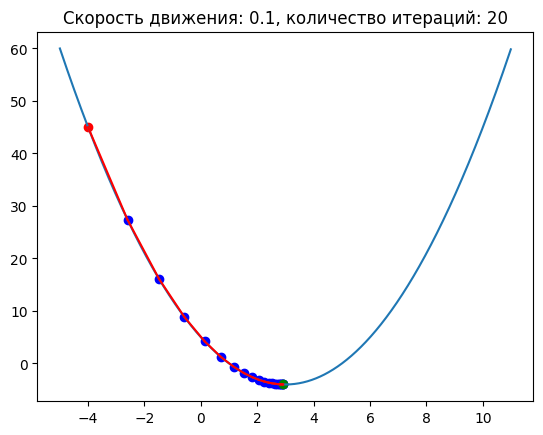

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999344992787 в точке 2.9997440689091954


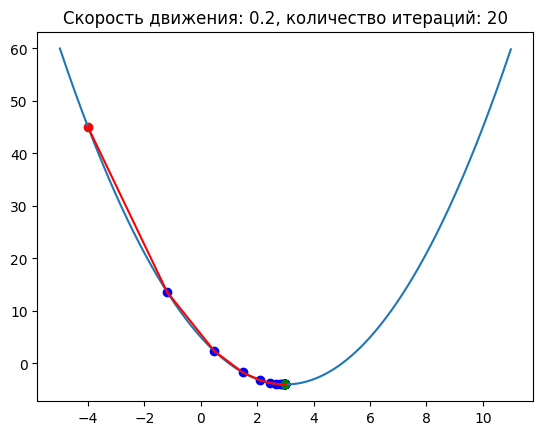

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999964 в точке 2.999999923034186


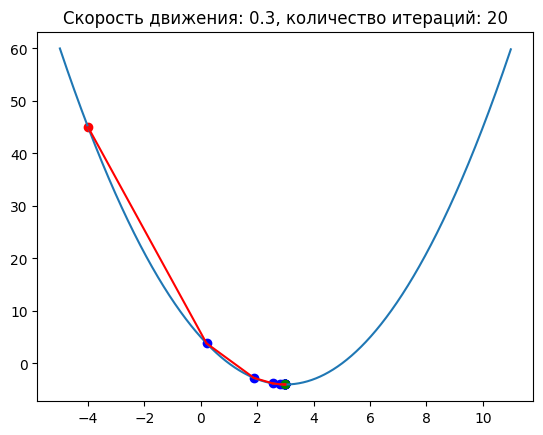

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999982 в точке 2.9999999999999267


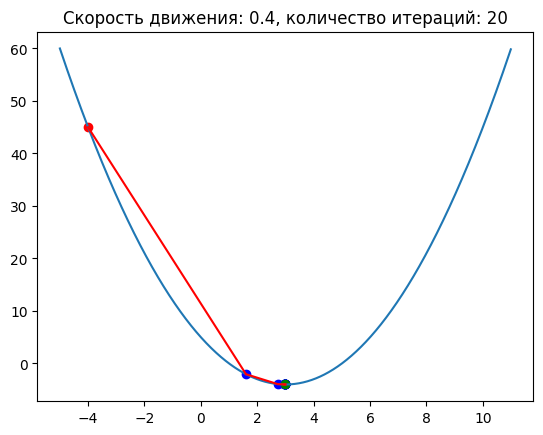

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -4.0 в точке 3.0


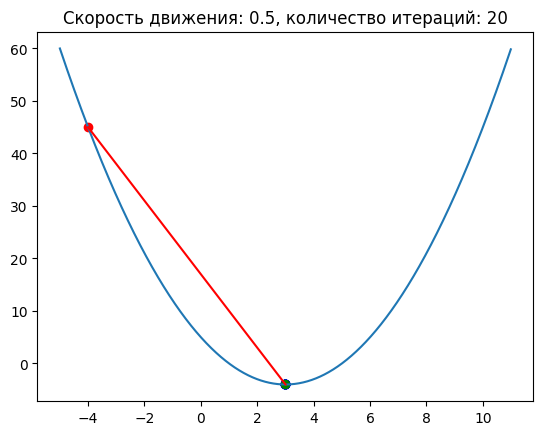

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999982 в точке 2.9999999999999267


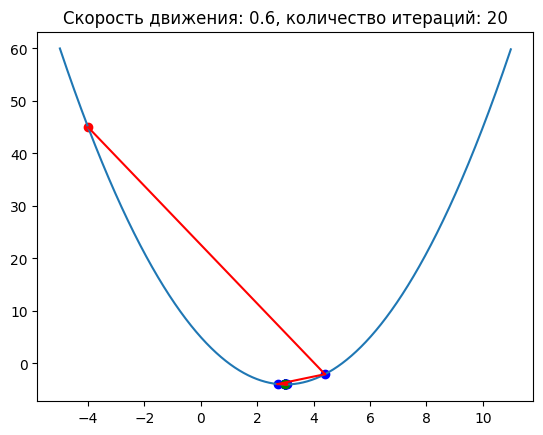

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999964 в точке 2.999999923034186


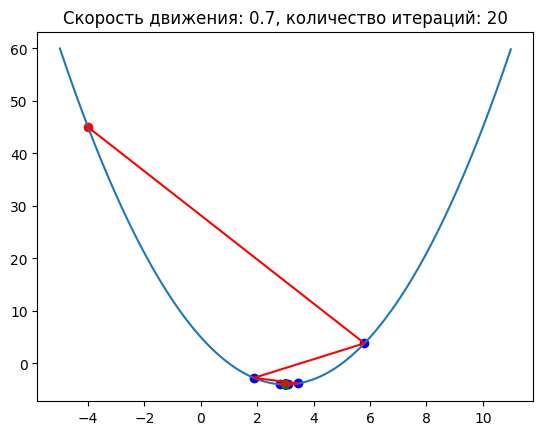

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999344992787 в точке 2.9997440689091954


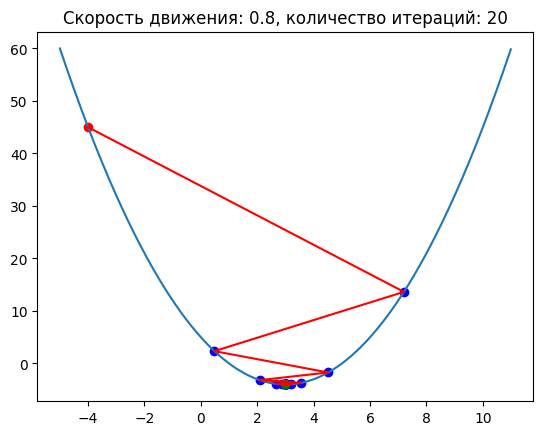

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.9192954946775207


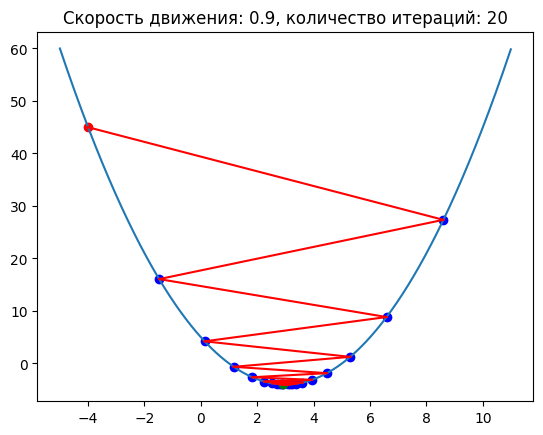

In [ ]:
# можно повести анализ влияния скорости обучения на результат оптимизации
for i in range(1, 10):
  gd(20, i/10)

#### Сложности оптимизации (локальные минимумы)

От точки, в которой вы начинается работу градиентного спуска зависит достаточно много в случае работы с теми функциями, которые имеют различные локальные и глобальные минимумым. Ниже приведён пример влияния точки старта на результат обучения.

Начальное значение минимумума: 91.83968333665945 в точке 10
Финальное значение минимумума: 4.529631081084053 в точке 4.129334334768743


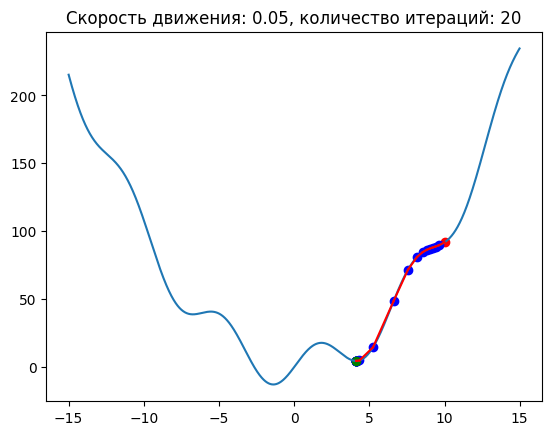

In [ ]:
gd(20, 0.05, min=-15, max= 15, f=f2, dfdx=df2dx, xc=10)

Начальное значение минимумума: 39.38386411994708 в точке -5
Финальное значение минимумума: -12.823616841551932 в точке -1.3851303718795267


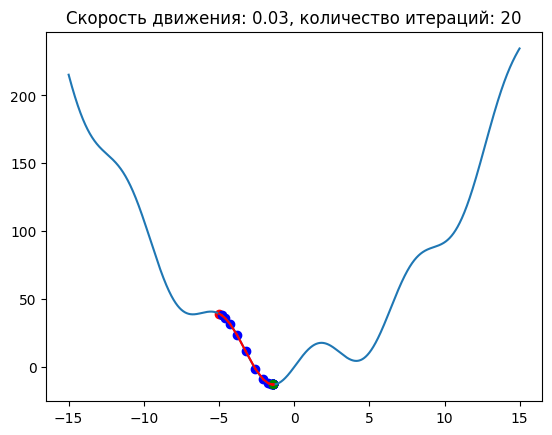

In [ ]:
gd(20, 0.03, min=-15, max= 15, f=f2, dfdx=df2dx, xc=-5)

###  Часть 3. Визуализация GD


$$w^{(t)} = w^{(t-1)} - \eta \nabla L(w^{(t-1)}),$$
$\eta$ — learning rate.

Сгенерируем матрицу признаков $X$ и вектор истинных весов $w_{true}$, вычислим целевую переменную $y$ как $y = Xw_{true} + noise$

In [ ]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
n_features = 2
n_objects = 300

np.random.seed(100)
w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales

Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

w_0 = np.random.uniform(-1, 1, (n_features))

Зададим параметры градиентного спуска:

In [ ]:
num_steps = 50

Обучим линейную регрессию методом градиентного спуска.

In [ ]:
step_size = 1e-2

w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())

w_list = np.array(w_list)

In [ ]:
import plotly.graph_objects as go


def compute_limits(w_list):
    dx = np.max(np.abs(w_list[:, 0] - w_true[0])) * 1.1
    dy = np.max(np.abs(w_list[:, 1] - w_true[1])) * 1.1

    return (w_true[0] - dx, w_true[0] + dx), (w_true[1] - dy, w_true[1] + dy)


def compute_levels(w_list, x_range, y_range, num: int = 100):
    x, y = np.linspace(x_range[0], x_range[1], num), np.linspace(y_range[0], y_range[1], num)
    A, B = np.meshgrid(x, y)

    levels = np.empty_like(A)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

    return x, y, levels


def make_contour(x, y, levels, name: str=None):
    return go.Contour(
        x=x,
        y=y,
        z=levels,
        contours_coloring='lines',
        line_smoothing=1,
        line_width=2,
        ncontours=100,
        opacity=0.5,
        name=name
    )


def make_arrow(figure, x, y):
    x, dx = x
    y, dy = y

    figure.add_annotation(
        x=x,
        y=y,
        ax=x + dx,
        ay=y + dy,
        xref='x',
        yref='y',
        text='',
        showarrow=True,
        axref = 'x',
        ayref='y',
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
    )


def plot_trajectory(w_list, name):
    # compute limits
    x_range, y_range = compute_limits(w_list)

    # compute level set
    x, y, levels = compute_levels(w_list, x_range, y_range)

    # plot levels
    contour = make_contour(x, y, levels, 'Loss function levels')

    # plot weights
    w_path = go.Scatter(
        x=w_list[:, 0][:-1],
        y=w_list[:, 1][:-1],
        mode='lines+markers',
        name='W',
        marker=dict(size=7, color='red')
    )

    # plot final weight
    w_final = go.Scatter(
        x=[w_list[:, 0][-1]],
        y=[w_list[:, 1][-1]],
        mode='markers',
        name='W_final',
        marker=dict(size=10, color='black'),
    )

    # plot true optimum
    w_true_point = go.Scatter(
        x=[w_true[0]],
        y=[w_true[1]],
        mode='markers',
        name='W_true',
        marker=dict(size=10, color='black'),
        marker_symbol='star'
    )

    # make the figure
    fig = go.Figure(data=[contour, w_path, w_final, w_true_point])

    fig.update_xaxes(type='linear', range=x_range)
    fig.update_yaxes(type='linear', range=y_range)

    fig.update_layout(title=name)

    fig.update_layout(
        autosize=True,
        width=700,
        margin=dict(
            l=50,
            r=50,
            b=50,
            t=100,
            pad=4
        ),
        paper_bgcolor='LightSteelBlue',
    )

    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

    fig.update_traces(showlegend=True)

    fig.show()

In [ ]:
plot_trajectory(w_list, 'Gradient descent')

Для наглядности визуализируем направления градиента в каждой точке.

In [ ]:
# make new figure with contour lines
x_range, y_range = compute_limits(w_list)
x, y, levels = compute_levels(w_list, x_range, y_range)
contour = make_contour(x, y, levels, 'Loss function levels')
fig = go.Figure(data=[contour])

# visualize the gradients

x_smol, y_smol, _ = compute_levels(w_list, x_range, y_range, num=10)
x_smol, y_smol = x_smol[1:-1], y_smol[1:-1]
A_smol, B_smol = np.meshgrid(x_smol, y_smol)

for i in range(A_smol.shape[0]):
    for j in range(A_smol.shape[1]):
        w_tmp = np.array([A_smol[i, j], B_smol[i, j]])

        antigrad = 0.003 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]

        make_arrow(fig, (A_smol[i, j], antigrad[0]), (B_smol[i, j], antigrad[1]))


fig.update_xaxes(type='linear', range=x_range)
fig.update_yaxes(type='linear', range=y_range)

fig.update_layout(title = 'Antigradient')

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

## Стохастический градиентный спуск

Случайным образом выбираем сэмпл из данных размера `batch_size` и считаем градиент на нем.

Это позволит упростить вычисления.


In [ ]:
batch_size = 10

In [ ]:
def calc_grad_on_batch(X, Y, w, batch_size):
    sample = np.random.randint(n_objects, size=batch_size)
    return 2 * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size

In [ ]:
step_size = 1e-2

w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

In [ ]:
plot_trajectory(w_list, f'Stochastic gradient descent, batch size = {batch_size}')

Как видно, метод стохастического градиента «бродит» вокруг оптимума. Это объясняется подбором шага градиентного спуска $\eta_k$. Дело в том, что для сходимости стохастического градиентного спуска для последовательности шагов $\eta_k$ должны выполняться [условия Роббинса-Монро](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586):
$$
\sum_{k = 1}^\infty \eta_k = \infty, \qquad \sum_{k = 1}^\infty \eta_k^2 < \infty.
$$
Интуитивно это означает следующее: (1) последовательность должна расходиться, чтобы метод оптимизации мог добраться до любой точки пространства, (2) но при этом расходиться не слишком быстро.



Посмотрим на траектории SGD, с последовательностью `learning_rate`, которая удовлетворяет этим условиям.

In [ ]:
num_steps

50

In [ ]:
step_size_0 = 0.01

w = w_0.copy()
w_list = [w.copy()]


for i in range(num_steps):
    step_size = step_size_0 / (i+1)
    w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

In [ ]:
plot_trajectory(w_list, 'Stochastic gradient descent with dynamic learning rate')

Сходимость есть, но до минимума не дошли. Попробуем что-то посложнее:
$$
    \eta_t
    =
    \lambda
    \left(
        \frac{1}{1 + t}
    \right)^p.
$$
Поэксперементируем с разными $\lambda$ и $p$.

In [ ]:
def sgd_with_lr_schedule(lambda_param, p=0.5, s_init=1.0, batch_size=10):
    w = w_0.copy()
    w_list = [w.copy()]


    for i in range(num_steps):
        step_size = lambda_param * np.power(s_init / (s_init + i), p)
        w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
        w_list.append(w.copy())

    return np.array(w_list)

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.8)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.5)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35)
plot_trajectory(w_list, 'SGD with learning rate schedule')

Коэффициенты в формуле - гиперпараметры, которые нужно подбирать на кросс-валидации.

Посмотрим, как влияет размер батча.

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=1)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=10)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=100)
plot_trajectory(w_list, 'SGD with learning rate schedule')

Вывод очевиден: чем больше батч, тем стабильнее градиентный спуск, но при этом:

- Требуется больше памяти (большие батчи погут не поместиться в GPU/CPU)

- Снижается скорость обучения (меньше обновлений весов за эпоху)

- Может ухудшаться обобщающая способность (модель чаще попадает в локальные минимумы)

- Увеличивается время на одну итерацию (хотя общее число итераций уменьшается)

- Снижается эффект регуляризации (меньше стохастичности в выборе данных)
